In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [2]:
# Load Dataset 
dataset_url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_" 

In [3]:
# Read dataset
df = pd.read_csv(dataset_url)

In [4]:
# Display first few rows
display(df.head())

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
# ---------------------- Data Exploration ----------------------
# List unique values in each column and their lengths
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [6]:
# Statistical summary
display(df.describe())

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
# Rename columns (if necessary)
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [8]:
# ---------------------- Data Cleaning ----------------------
# Check for missing values
display(df.isnull().sum())

company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

In [11]:
# Replace value 0 in age with NaN
df['age']=df['age'].replace(0, np.nan)

In [15]:
# Fill missing values with mean/median/mode (based on distribution)
df = df.fillna(df.median(numeric_only=True))

In [23]:
# Detect and remove outliers using IQR
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
outlier_mask = (df.loc[:,Q1.index]< (Q1 - 1.5 * IQR)) | (df.loc[:,Q3.index] > (Q3 + 1.5 * IQR))
df = df[~outlier_mask.any(axis=1)]


In [24]:
# ---------------------- Data Analysis ----------------------
# Filter age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
display(filtered_df)


,company,age,salary,place,country,gender


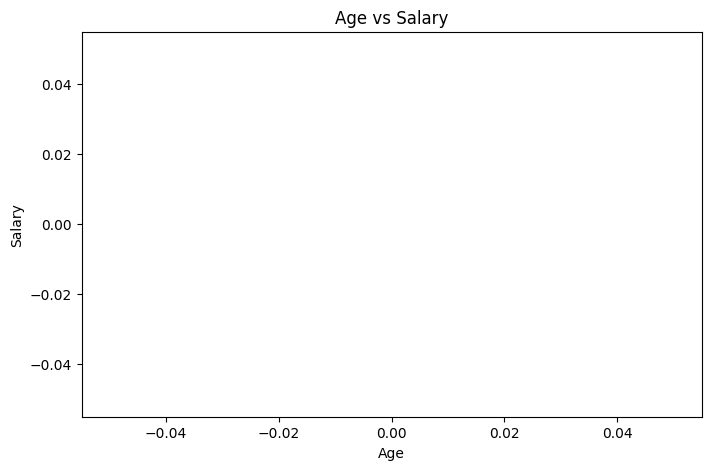

In [25]:
# Plot Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

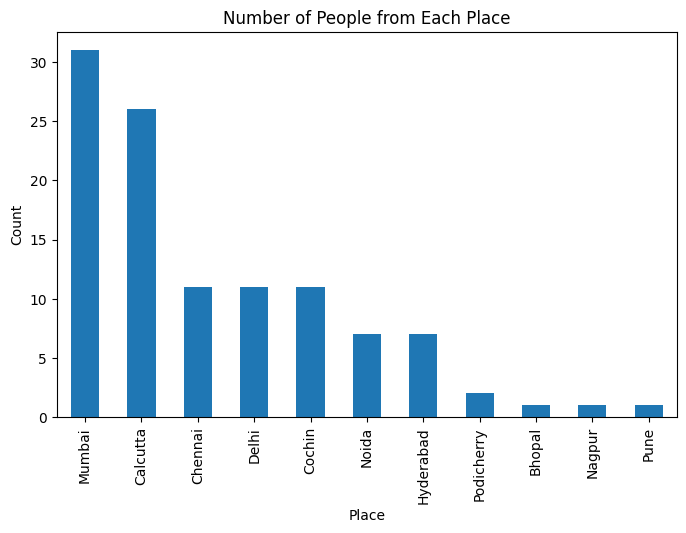

In [26]:
# Count of people from each place
place_counts = df['place'].value_counts()
place_counts.plot(kind='bar', figsize=(8,5))
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("Number of People from Each Place")
plt.show()

In [29]:
# ---------------------- Data Encoding ----------------------
# Label Encoding for categorical variables
df = df.copy() 
label_encoder = LabelEncoder()
df.loc[:, 'place'] = label_encoder.fit_transform(df['place'])


In [31]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['gender', 'place'], drop_first=True)

In [32]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()


In [33]:
# Select numerical columns to scale
num_cols = df.select_dtypes(include=[np.number]).columns


In [34]:
# Apply StandardScaler
df[num_cols] = scaler_standard.fit_transform(df[num_cols])


In [35]:
# Apply MinMaxScaler
df[num_cols] = scaler_minmax.fit_transform(df[num_cols])


In [36]:
# Display processed dataset
display(df.head())


,company,age,salary,country,place_1,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10,place_11
0,TCS,None,0.494375,India,False,True,False,False,False,False,False,False,False,False,False
1,Infosys,None,0.494375,India,False,False,False,False,False,True,False,False,False,False,False
2,TCS,None,0.153078,India,True,False,False,False,False,False,False,False,False,False,False
3,Infosys,None,0.241562,India,False,False,False,True,False,False,False,False,False,False,False
4,TCS,None,0.367969,India,False,False,False,False,False,True,False,False,False,False,False


In [37]:
# Save cleaned dataset
df.to_csv("processed_data.csv", index=False)
